Alejandro Alquezar Pitarch - University Project

# Technical application of variable reduction

In [2]:
library(readr)
library(GPArotation)
library(psych)

We start by loading the dataset and observing its structure.

In [4]:
datos <- read.csv("vinos.csv",
                  header = TRUE, 
                  sep = ";",
                  encoding = "latin1",
                  stringsAsFactors = FALSE,
                  dec =",")

In [5]:
head(datos)

,Clase,Alcohol,Ácido.Málico,Magnesio,Flavanoides,Matiz,Proantocianidinas,Prolina
,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,Ribera,11.03,1.51,85,2.17,1.90,1.71,407
2,Ribera,11.41,0.74,88,2.01,3.08,1.10,434
3,Ribera,11.45,2.40,96,2.79,3.25,0.80,625
4,Ribera,11.46,3.74,107,2.58,2.90,0.75,562
5,Ribera,11.56,2.05,119,5.08,6.00,0.93,465
6,Ribera,11.61,1.35,94,2.92,2.65,0.96,680


For the factorial analysis, we won't use the first variable and only utilize the other seven quantitative variables. First, we use the KMO() function, which displays the Kaiser-Meyer-Olkin adequacy factor and the sampling adequacy measure (MSA). In our case, the value is 0.69, indicating a good fit for conducting the factorial analysis.

In [6]:
KMO(datos[2:8])

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = datos[2:8])
Overall MSA =  0.69
MSA for each item = 
          Alcohol      Ácido.Málico          Magnesio       Flavanoides 
             0.66              0.71              0.82              0.79 
            Matiz Proantocianidinas           Prolina 
             0.61              0.64              0.69 

Next, we proceed with the principal axis factoring method. Since we don't yet know the number of factors we will need, we choose nfactors = 4, which is the maximum theoretical value that does not give us an error when implementing the function.

In [7]:
# Metodo de los ejes principales
fit.pa <- fa(datos[2:8], nfactors=4, fm="pa", rotate = "none")
print(fit.pa)

Factor Analysis using method =  pa
Call: fa(r = datos[2:8], nfactors = 4, rotate = "none", fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
                    PA1   PA2   PA3   PA4   h2   u2 com
Alcohol            0.63  0.57  0.17 -0.25 0.82 0.18 2.5
Ácido.Málico      -0.40  0.53  0.38  0.07 0.59 0.41 2.8
Magnesio           0.38  0.16 -0.01  0.22 0.22 0.78 2.0
Flavanoides        0.65 -0.32  0.05  0.01 0.53 0.47 1.5
Matiz              0.18  0.84 -0.32 -0.03 0.85 0.15 1.4
Proantocianidinas  0.48 -0.71  0.03 -0.08 0.74 0.26 1.8
Prolina            0.86  0.22  0.06  0.16 0.81 0.19 1.2

                       PA1  PA2  PA3  PA4
SS loadings           2.13 2.00 0.29 0.15
Proportion Var        0.30 0.29 0.04 0.02
Cumulative Var        0.30 0.59 0.63 0.65
Proportion Explained  0.47 0.44 0.06 0.03
Cumulative Proportion 0.47 0.90 0.97 1.00

Mean item complexity =  1.9
Test of the hypothesis that 4 factors are sufficient.

df null model =  21  with the objective func

Upon examining the second table, we can see that the cumulative variability in the first two factors increases from 0.30 to 0.60, indicating significant variability. In the subsequent two factors, it only varies from 0.4 to 0.6. This suggests that the analysis could be conducted using only the first two factors. 

The model explains only 65% of the variability, with the remaining 35% attributed to unique factors. 

To verify how many factors we should use, I employ the parallel() function, which confirms our earlier prediction by indicating that the number of factors to be extracted is 2.

Parallel analysis suggests that the number of factors =  2  and the number of components =  NA 


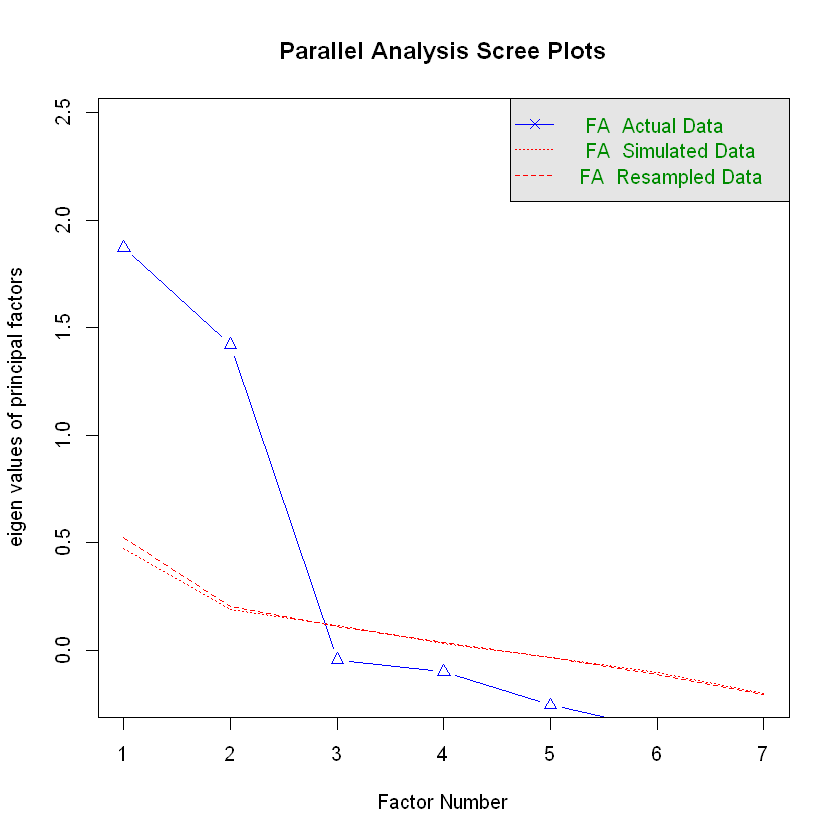

In [8]:
fa.parallel(datos[,2:8],fa="fa",fm="pa")

Once we have determined the number of factors, I conduct the various factorial analyses with nfactors = 2.

### Without Rotation

In [9]:
# Sin rotación
fit.pa <- fa(datos[2:8], nfactors = 2, rotate = "none")
print(fit.pa)

Factor Analysis using method =  minres
Call: fa(r = datos[2:8], nfactors = 2, rotate = "none")
Standardized loadings (pattern matrix) based upon correlation matrix
                    MR1   MR2   h2   u2 com
Alcohol            0.50  0.63 0.65 0.35 1.9
Ácido.Málico      -0.44  0.41 0.36 0.64 2.0
Magnesio           0.34  0.22 0.17 0.83 1.7
Flavanoides        0.71 -0.21 0.54 0.46 1.2
Matiz              0.03  0.80 0.64 0.36 1.0
Proantocianidinas  0.61 -0.65 0.80 0.20 2.0
Prolina            0.81  0.38 0.81 0.19 1.4

                       MR1  MR2
SS loadings           2.09 1.88
Proportion Var        0.30 0.27
Cumulative Var        0.30 0.57
Proportion Explained  0.53 0.47
Cumulative Proportion 0.53 1.00

Mean item complexity =  1.6
Test of the hypothesis that 2 factors are sufficient.

df null model =  21  with the objective function =  2.71 with Chi Square =  470.59
df of  the model are 8  and the objective function was  0.1 

The root mean square of the residuals (RMSR) is  0.03 
The df 

### Maximum Likelihood

In [10]:
# Maxima verisilitud
fit.ml <- fa(datos[2:8], nfactors = 2, fm = "ml", rotate = "none")
print(fit.ml)

Factor Analysis using method =  ml
Call: fa(r = datos[2:8], nfactors = 2, rotate = "none", fm = "ml")
Standardized loadings (pattern matrix) based upon correlation matrix
                    ML1   ML2   h2   u2 com
Alcohol            0.53  0.62 0.66 0.34 2.0
Ácido.Málico      -0.43  0.43 0.37 0.63 2.0
Magnesio           0.35  0.22 0.17 0.83 1.7
Flavanoides        0.70 -0.22 0.54 0.46 1.2
Matiz              0.04  0.82 0.67 0.33 1.0
Proantocianidinas  0.59 -0.66 0.79 0.21 2.0
Prolina            0.81  0.35 0.78 0.22 1.4

                       ML1  ML2
SS loadings           2.08 1.89
Proportion Var        0.30 0.27
Cumulative Var        0.30 0.57
Proportion Explained  0.52 0.48
Cumulative Proportion 0.52 1.00

Mean item complexity =  1.6
Test of the hypothesis that 2 factors are sufficient.

df null model =  21  with the objective function =  2.71 with Chi Square =  470.59
df of  the model are 8  and the objective function was  0.1 

The root mean square of the residuals (RMSR) is  0.03 


### Orthogonal Varimax Rotation

In [11]:
# Varimax rotación ortogonal
fit.pavar <- fa(datos[2:8], nfactors = 2, fm= "pa", rotate="varimax")
print(fit.pavar)

Factor Analysis using method =  pa
Call: fa(r = datos[2:8], nfactors = 2, rotate = "varimax", fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
                    PA1   PA2   h2   u2 com
Alcohol            0.80 -0.11 0.65 0.35 1.0
Ácido.Málico      -0.03 -0.60 0.36 0.64 1.0
Magnesio           0.40  0.08 0.17 0.83 1.1
Flavanoides        0.36  0.64 0.54 0.46 1.6
Matiz              0.58 -0.55 0.64 0.36 2.0
Proantocianidinas -0.01  0.89 0.80 0.20 1.0
Prolina            0.85  0.29 0.80 0.20 1.2

                       PA1  PA2
SS loadings           1.99 1.98
Proportion Var        0.28 0.28
Cumulative Var        0.28 0.57
Proportion Explained  0.50 0.50
Cumulative Proportion 0.50 1.00

Mean item complexity =  1.3
Test of the hypothesis that 2 factors are sufficient.

df null model =  21  with the objective function =  2.71 with Chi Square =  470.59
df of  the model are 8  and the objective function was  0.1 

The root mean square of the residuals (RMSR) is  0.0

### Promax oblique rotation

In [12]:
# Promax rotación oblicua
fit.papro <- fa(datos[2:8], nfactors = 2, fm = "pa", rotate = "promax")
print(fit.papro)

Factor Analysis using method =  pa
Call: fa(r = datos[2:8], nfactors = 2, rotate = "promax", fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
                    PA1   PA2   h2   u2 com
Alcohol            0.80 -0.14 0.65 0.35 1.1
Ácido.Málico      -0.01 -0.60 0.36 0.64 1.0
Magnesio           0.40  0.06 0.17 0.83 1.1
Flavanoides        0.34  0.63 0.54 0.46 1.5
Matiz              0.60 -0.57 0.64 0.36 2.0
Proantocianidinas -0.04  0.90 0.80 0.20 1.0
Prolina            0.84  0.26 0.80 0.20 1.2

                       PA1  PA2
SS loadings           1.99 1.98
Proportion Var        0.28 0.28
Cumulative Var        0.28 0.57
Proportion Explained  0.50 0.50
Cumulative Proportion 0.50 1.00

 With factor correlations of 
     PA1  PA2
PA1 1.00 0.06
PA2 0.06 1.00

Mean item complexity =  1.3
Test of the hypothesis that 2 factors are sufficient.

df null model =  21  with the objective function =  2.71 with Chi Square =  470.59
df of  the model are 8  and the objective 

The correlations between factors PA1 and PA2 are displayed, showing a moderate correlation of 0.06. This indicates that the Promax rotation has allowed some correlation between the factors.

### Factor Scores

In [13]:
# Puntuaciones factoriales
factor.scores(datos[,2:8], fit.pa, method = "Bartlett")

MR1,MR2
0.341411863,-3.3911334
-0.582598381,-1.6847081
-0.722310443,-0.6389015
-1.033545542,-0.4645906
-0.149749731,-0.7738668
-0.197561990,-1.1032863
-0.595619294,-1.6870869
-0.465088495,-1.0357842
0.009212968,-2.0343471
-0.447156106,-1.6301764


Factorial scores for each of the 178 observations in the dataset are shown. The factors represent linear combinations of the original variables. "$weights" indicate the factor loading of each variable with respect to each factor. The correlation matrix of the scores indicates the correlation between the two extracted factors. In this case, the correlation is practically 0, suggesting that the factors are orthogonal or uncorrelated.